# 🔬 Deep Data Analyzing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
#import data

In [4]:
file_path = r"..\data\02_Interim\01_DataCompetencySurvey.csv"
#file_path = data.get_path("02_Interim", "01_DataCompetencySurvey.csv")
df = pd.read_csv(file_path, index_col=0)

#Define style for visuals
barColor = "#081D57"
backgroundColor = "#FFFFD9"

### Visualization of Participation Preferences in Community Survey

This code segment visualizes the distribution of participation preferences among survey respondents. Using a bar chart, it displays the counts of different participation types: 
* "Chcę uczystniczyć", 
* "Chcę organizować", 
* "Chcę konsumować", 
* "Chcę org. + ucz.". 

Each bar represents the number of respondents who expressed a particular preference. The chart provides an overview of the community's engagement preferences, aiding in understanding the dynamics of participation within the surveyed population.

In [5]:
counts = (
    df[["Chcę uczystniczyć", "Chcę organizować", "Chcę konsumować", "Chcę org. + ucz."]]
    .sum()
    .sort_values()
)
counts.plot(kind="bar", figsize=(10, 4), color=barColor).set_facecolor(backgroundColor)
plt.title("Counts of Participation Types")
plt.xlabel("Participation Type", labelpad=20)
plt.ylabel("Counts")
plt.xticks(rotation=0)

for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha="center", va="bottom")
plt.show()

NameError: name 'barColor' is not defined

### Correlation Matrix  Visualization

This code calculates the correlation matrix for numerical variables in a DataFrame, classifies the correlation values, and visualizes the classified correlations using a heatmap. It helps identify strong dependencies between variables, assists in dimension reduction, and detects multicollinearity issues. The classified heatmap provides a clear visual representation of high, medium, and low correlations.

C:\Users\aleks\AppData\Local\Temp\ipykernel_16864\1662269258.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  classified_matrix = corr_matrix.applymap(classify_correlation)


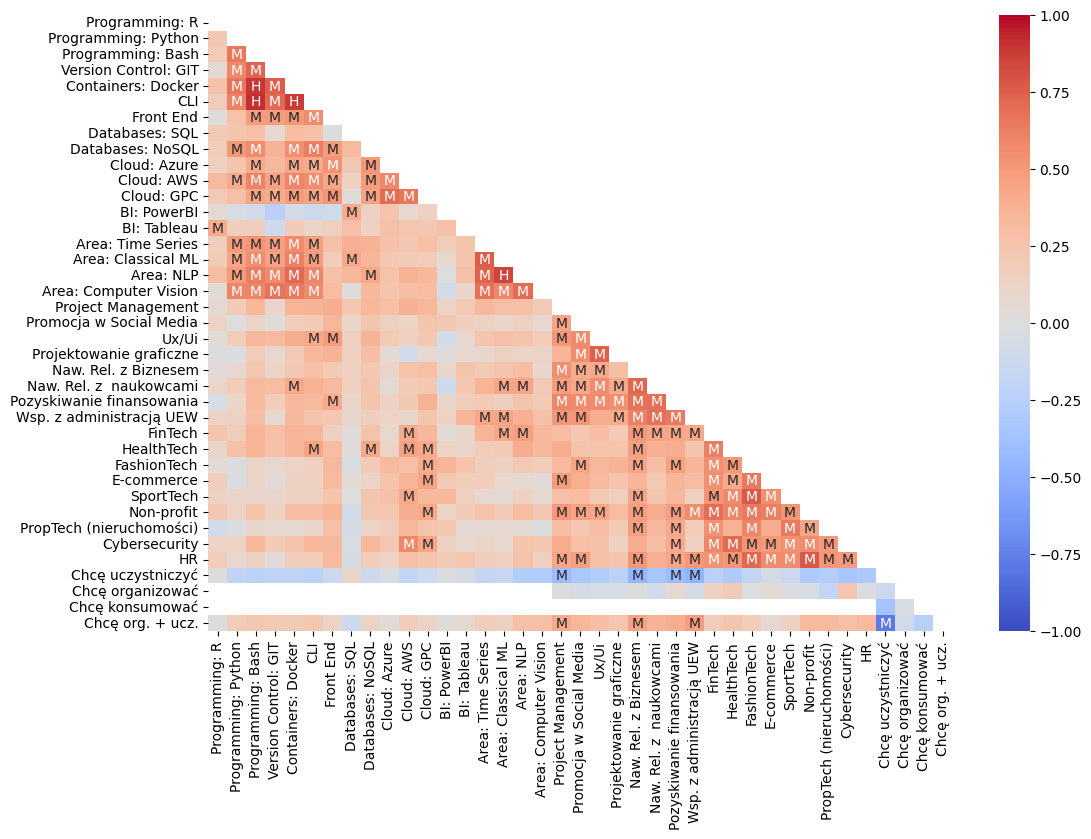

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()


# Absolute value higher than 0.7 is high correlated value | between 0.3 and 0.7 is medium correlated | less than 0.3 is low correlated
def classify_correlation(corr_value):
    if abs(corr_value) >= 0.8:
        return "H"
    elif abs(corr_value) >= 0.4:
        return "M"
    else:
        return ""


classified_matrix = corr_matrix.applymap(classify_correlation)

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=classified_matrix,
    fmt="",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
)
plt.show()

### Dendrogram Visualization

This code performs hierarchical clustering on a filtered and transposed numerical DataFrame, excluding specific columns. It visualizes the clustering results with a dendrogram, illustrating the relationships and natural groupings among features based on their similarities. This helps in feature analysis, identifying similar features, and potential data reduction.

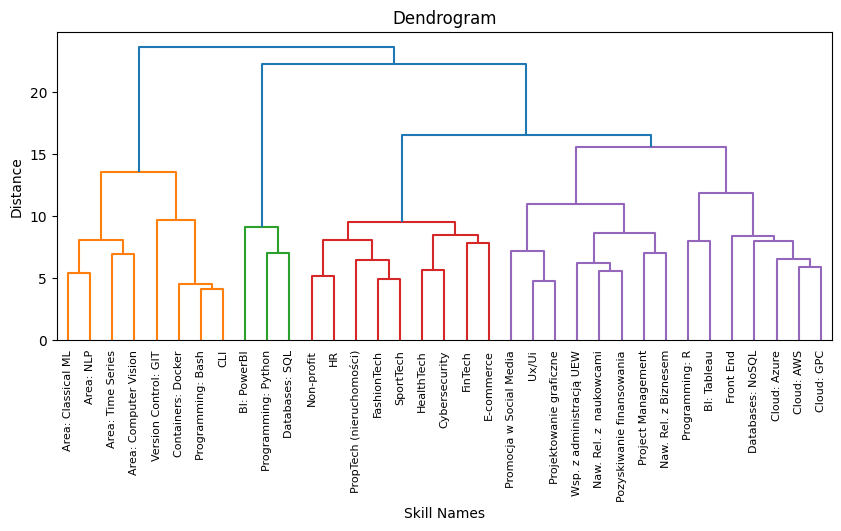

In [ ]:
df_filtered = numeric_df.drop(
    columns=[
        "Chcę uczystniczyć",
        "Chcę organizować",
        "Chcę konsumować",
        "Chcę org. + ucz.",
    ]
)
df_transposed = df_filtered.dropna().T
clustering = sch.linkage(df_transposed, method="ward")
# Plot the dendrogram
plt.figure(figsize=(10, 4))
sch.dendrogram(clustering, labels=df_transposed.index)
plt.xticks(rotation=90)
plt.title("Dendrogram")
plt.xlabel("Skill Names")
plt.ylabel("Distance")
plt.show()

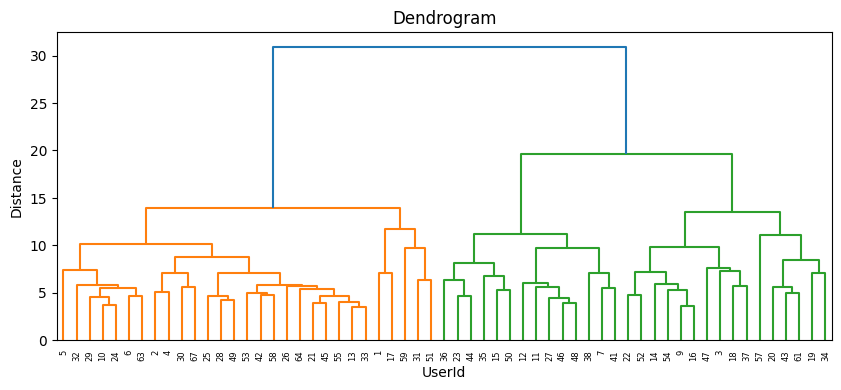

In [ ]:
df_transposed = numeric_df.dropna()
clustering = sch.linkage(df_transposed, method="ward")
# Plot the dendrogram
plt.figure(figsize=(10, 4))
sch.dendrogram(clustering, labels=df_transposed.index)
plt.xticks(rotation=90)
plt.title("Dendrogram")
plt.xlabel("UserId")
plt.ylabel("Distance")
plt.show()

* 0 - Nieświadomy - jeszcze o tym nie słyszałem/am
* 1 - Niezainteresowany - nie umiem, wolę coś innego
* 2 - Zainteresowany - nie umiem, jednak chce się nauczyć
* 3 - Kompetentny - umiem/interesuje się
* 4 - Mentor - umiem i chcę pomagać innym


<Figure size 1000x600 with 0 Axes>

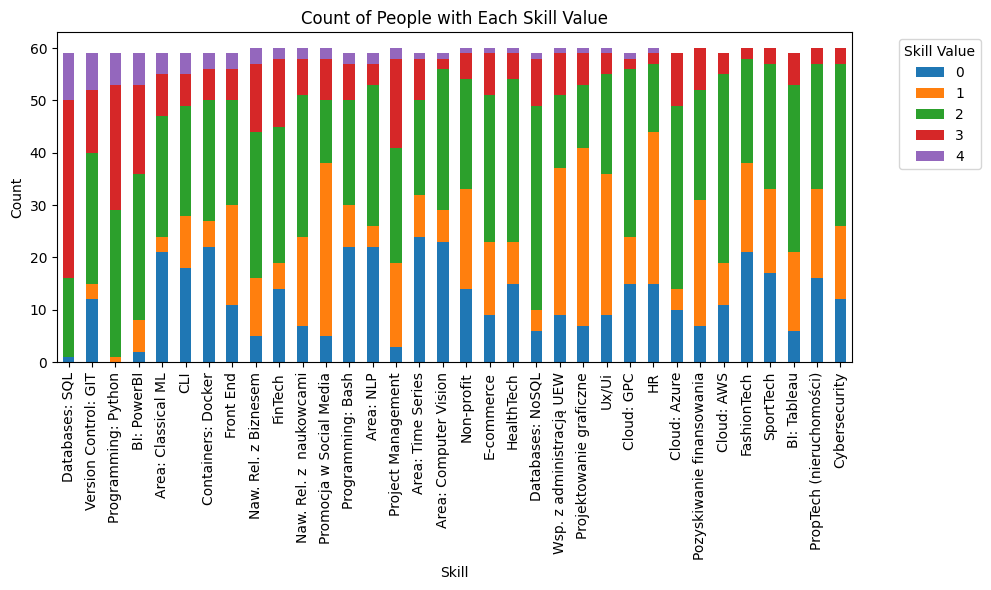

In [ ]:
#numeric_df.describe()

skill_values = list(range(5))

skill_counts = {value: [] for value in skill_values}
numeric_df_filtered = numeric_df.drop(
    columns=[
        "Chcę uczystniczyć",
        "Chcę organizować",
        "Chcę konsumować",
        "Chcę org. + ucz.",
    ]
)
for col in numeric_df_filtered.columns[1:]:
    for value in skill_values:
        count = (numeric_df_filtered[col] == value).sum()
        skill_counts[value].append(count)

count_df = pd.DataFrame(skill_counts, index=numeric_df_filtered.columns[1:])
count_df = count_df.sort_values(by=4, ascending=False)

plt.figure(figsize=(10, 6))
count_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Count of People with Each Skill Value")
plt.xlabel("Skill")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Skill Value", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
numeric_df_filtered = numeric_df_filtered.dropna()
# Determine the number of clusters (for simplicity, let's use 3)
kmeans = KMeans(n_clusters=5, random_state=0).fit(numeric_df_filtered)

# Add cluster labels to the original DataFrame
numeric_df_filtered["Cluster"] = kmeans.labels_
# numeric_df_filtered.sort_values(by="Cluster")
# # Plot pairplot with seaborn
# plt.figure(figsize=(10, 6))
# sns.pairplot(numeric_df_filtered, hue='Cluster', palette='colorblind', diag_kind='kde')
# plt.title('Clusters of Individuals Based on Skill Values')
# plt.show()